<a href="https://colab.research.google.com/github/RanjithKishore/colab/blob/master/imdbpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

In [2]:
import keras

Using TensorFlow backend.


In [3]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [3]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [ ]:
train_data[0]

In [7]:
train_labels[0]

1

In [16]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
  return results


In [17]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [18]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [19]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

Train on 23000 samples, validate on 2000 samples
Epoch 1/18
23000/23000 [==============================] - 4s 153us/step - loss: 0.1646 - accuracy: 0.7976 - val_loss: 0.0983 - val_accuracy: 0.8835
Epoch 2/18
23000/23000 [==============================] - 2s 108us/step - loss: 0.0703 - accuracy: 0.9149 - val_loss: 0.0855 - val_accuracy: 0.8905
Epoch 3/18
23000/23000 [==============================] - 2s 90us/step - loss: 0.0470 - accuracy: 0.9456 - val_loss: 0.0825 - val_accuracy: 0.8955
Epoch 4/18
23000/23000 [==============================] - 2s 85us/step - loss: 0.0346 - accuracy: 0.9628 - val_loss: 0.0848 - val_accuracy: 0.8925
Epoch 5/18
23000/23000 [==============================] - 3s 114us/step - loss: 0.0252 - accuracy: 0.9756 - val_loss: 0.0881 - val_accuracy: 0.8890
Epoch 6/18
23000/23000 [==============================] - 3s 116us/step - loss: 0.0183 - accuracy: 0.9835 - val_loss: 0.0908 - val_accuracy: 0.8880
Epoch 7/18
23000/23000 [==============================] - 2s 100u

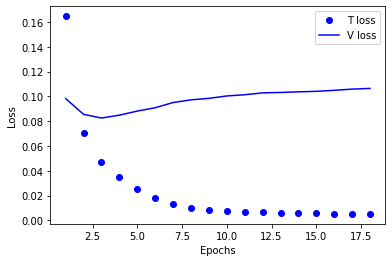

In [40]:
from keras import models,layers
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
history=model.fit(x_train[:23000],y_train[:23000],epochs=18,batch_size=512,validation_data=(x_train[23000:],y_train[23000:]))
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range(1,19)
plt.plot(epochs,loss_values,'bo',label='T loss')
plt.plot(epochs,val_loss,'b',label='V loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

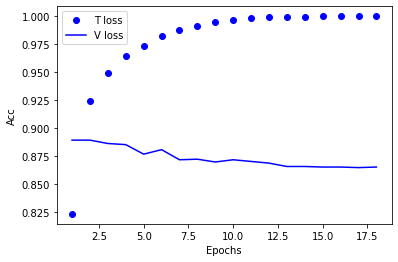

In [37]:
acc_values=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
epochs=range(1,19)
plt.plot(epochs,acc_values,'bo',label='T loss')
plt.plot(epochs,val_acc,'b',label='V loss')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [41]:
result=model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 89us/step


In [42]:
result

[0.1166979104271531, 0.8612800240516663]